# (Split 7/3)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [131077.17914461 131158.89866476 131240.61818491 131322.33770506
 131404.05722521 131485.77674537 131567.49626552 131649.21578567
 131730.93530582 131812.65482597 131894.37434612 131976.09386628
 132057.81338643 132139.53290658 132221.25242673 132302.97194688
 132384.69146703 132466.41098718 132548.13050734 132629.85002749
 132711.56954764 132793.28906779 132875.00858794 132956.72810809
 133038.44762825 133120.1671484  133201.88666855 133283.6061887
 133365.32570885 133447.045229  ]
Future Predictions (60 days): [133528.76474915 133610.48426931 133692.20378946 133773.92330961
 133855.64282976 133937.36234991 134019.08187006 134100.80139022
 134182.52091037 134264.24043052 134345.95995067 134427.67947082
 134509.39899097 134591.11851113 134672.83803128 134754.55755143
 134836.27707158 134917.99659173 134999.71611188 135081.43563203
 135163.15515219 135244.87467234 135326.59419249 135408.31371264
 135490.03323279 135571.75275294 135653.4722731  135735.191793

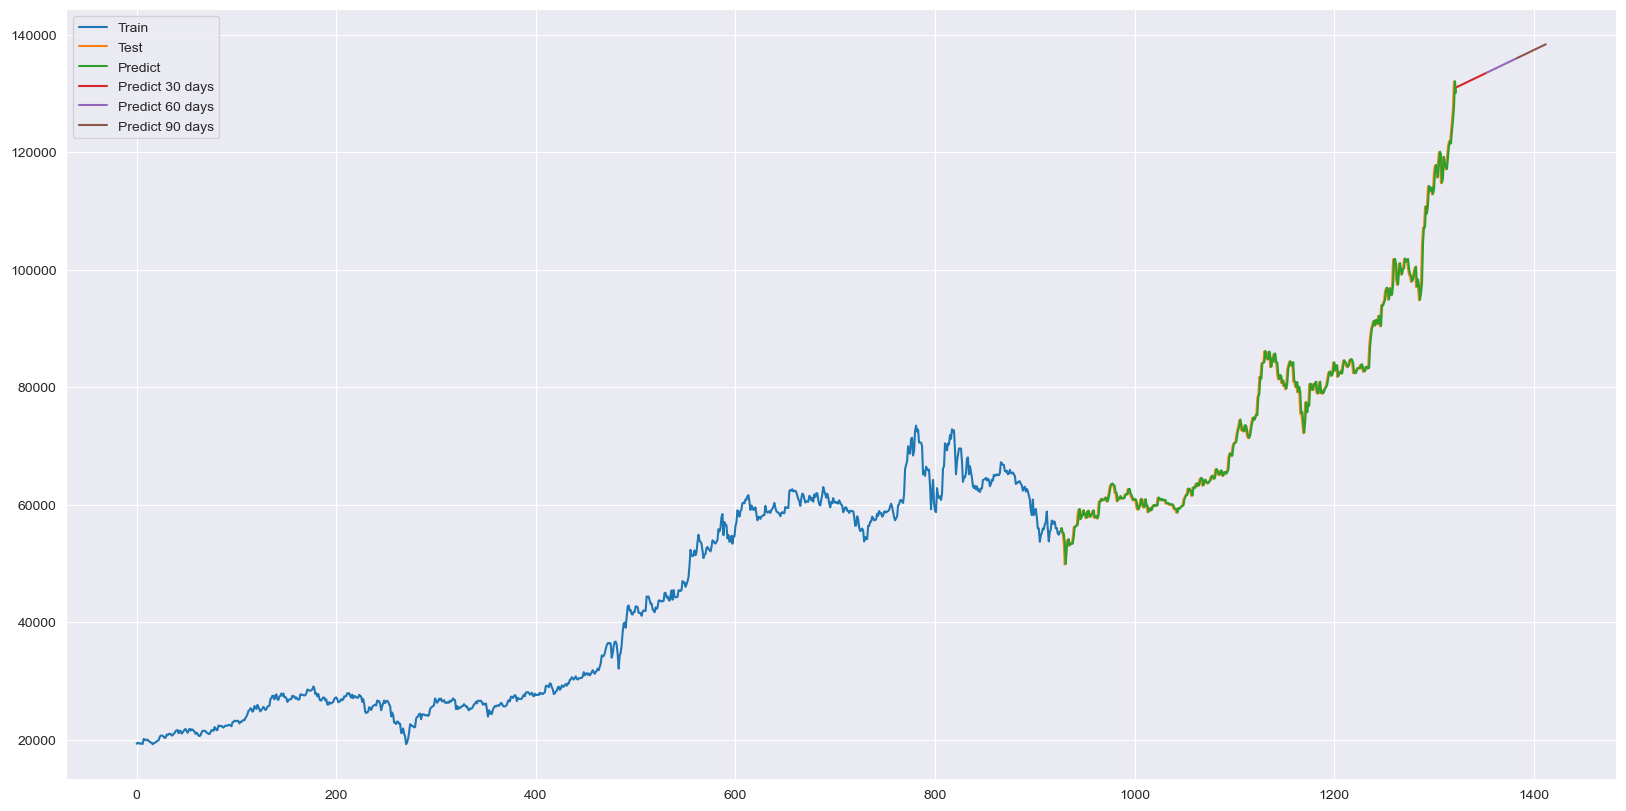

In [36]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\FPT.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()


# (Split 8/2)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [131077.17914461 131158.89866476 131240.61818491 131322.33770506
 131404.05722521 131485.77674537 131567.49626552 131649.21578567
 131730.93530582 131812.65482597 131894.37434612 131976.09386628
 132057.81338643 132139.53290658 132221.25242673 132302.97194688
 132384.69146703 132466.41098718 132548.13050734 132629.85002749
 132711.56954764 132793.28906779 132875.00858794 132956.72810809
 133038.44762825 133120.1671484  133201.88666855 133283.6061887
 133365.32570885 133447.045229  ]
Future Predictions (60 days): [133528.76474915 133610.48426931 133692.20378946 133773.92330961
 133855.64282976 133937.36234991 134019.08187006 134100.80139022
 134182.52091037 134264.24043052 134345.95995067 134427.67947082
 134509.39899097 134591.11851113 134672.83803128 134754.55755143
 134836.27707158 134917.99659173 134999.71611188 135081.43563203
 135163.15515219 135244.87467234 135326.59419249 135408.31371264
 135490.03323279 135571.75275294 135653.4722731  135735.191793

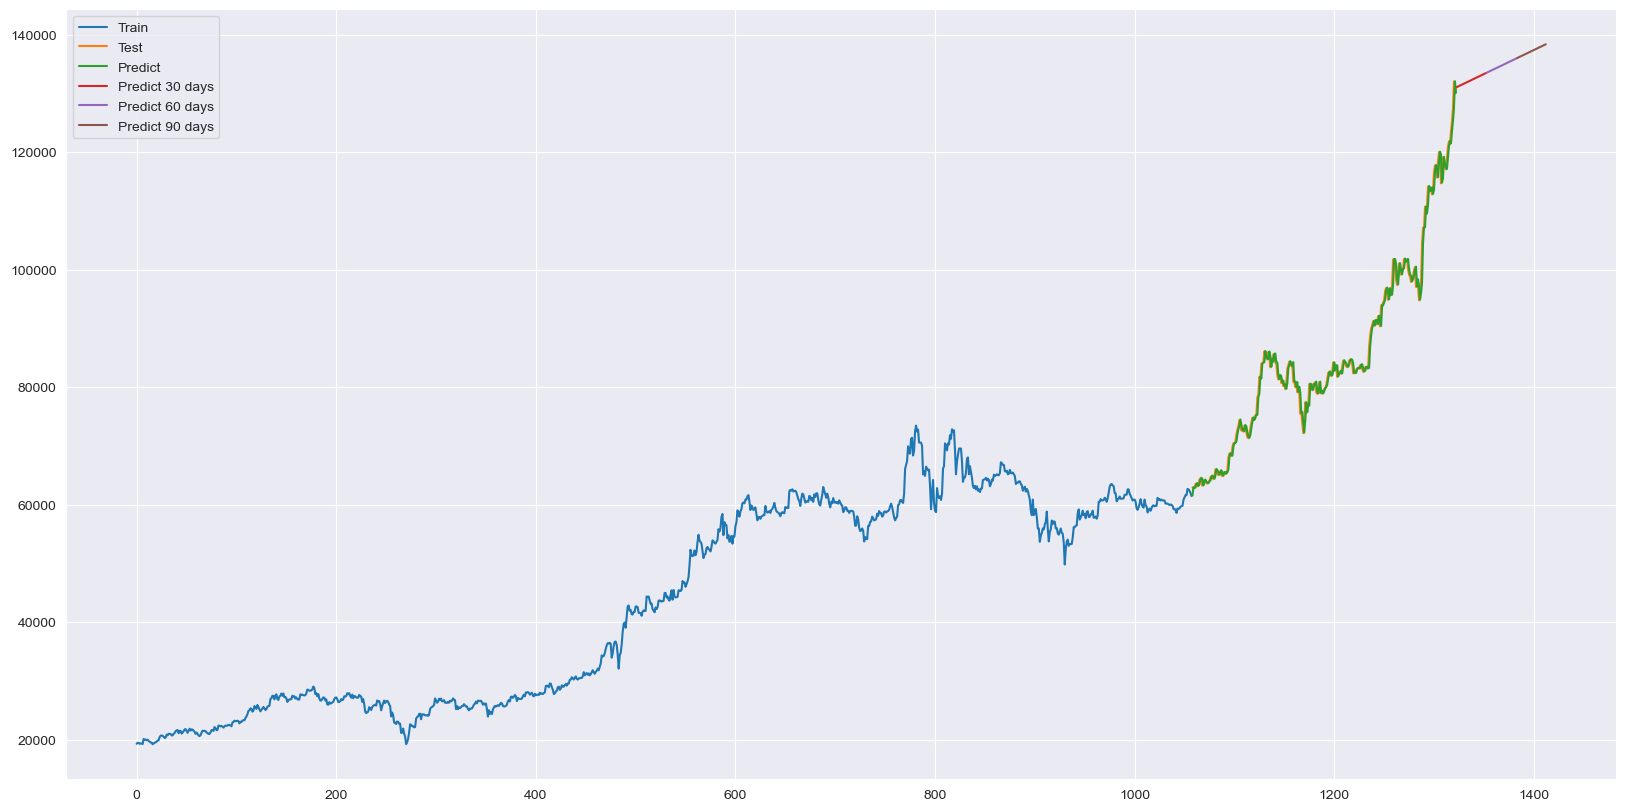

In [37]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\FPT.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()


# (Split 9/1)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [131077.17914461 131158.89866476 131240.61818491 131322.33770506
 131404.05722521 131485.77674537 131567.49626552 131649.21578567
 131730.93530582 131812.65482597 131894.37434612 131976.09386628
 132057.81338643 132139.53290658 132221.25242673 132302.97194688
 132384.69146703 132466.41098718 132548.13050734 132629.85002749
 132711.56954764 132793.28906779 132875.00858794 132956.72810809
 133038.44762825 133120.1671484  133201.88666855 133283.6061887
 133365.32570885 133447.045229  ]
Future Predictions (60 days): [133528.76474915 133610.48426931 133692.20378946 133773.92330961
 133855.64282976 133937.36234991 134019.08187006 134100.80139022
 134182.52091037 134264.24043052 134345.95995067 134427.67947082
 134509.39899097 134591.11851113 134672.83803128 134754.55755143
 134836.27707158 134917.99659173 134999.71611188 135081.43563203
 135163.15515219 135244.87467234 135326.59419249 135408.31371264
 135490.03323279 135571.75275294 135653.4722731  135735.191793

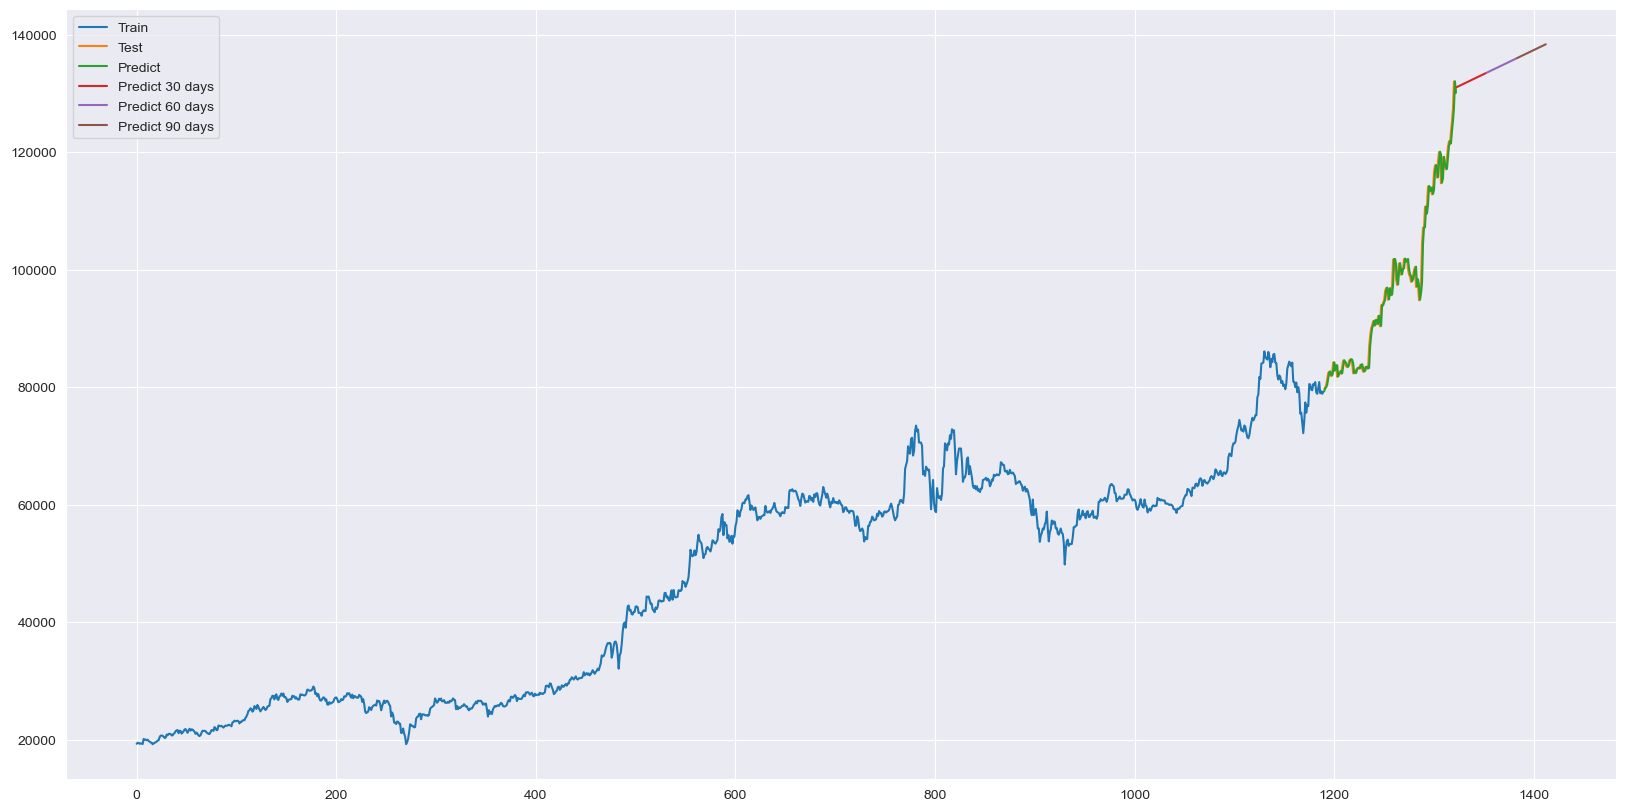

In [38]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\FPT.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ
train_size = int(0.9 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()
